# 矢量量化的降维是在同等样本量上压缩信息的大小
用聚类后的质心替换每个簇中的值，使得原始数据尽量保持信息不变

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

# 数据探索

In [2]:
china = load_sample_image("china.jpg")
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [3]:
china.shape

(427, 640, 3)

In [5]:
newImage = china.reshape((427*640,3))
pd.DataFrame(newImage).drop_duplicates().shape

(96615, 3)

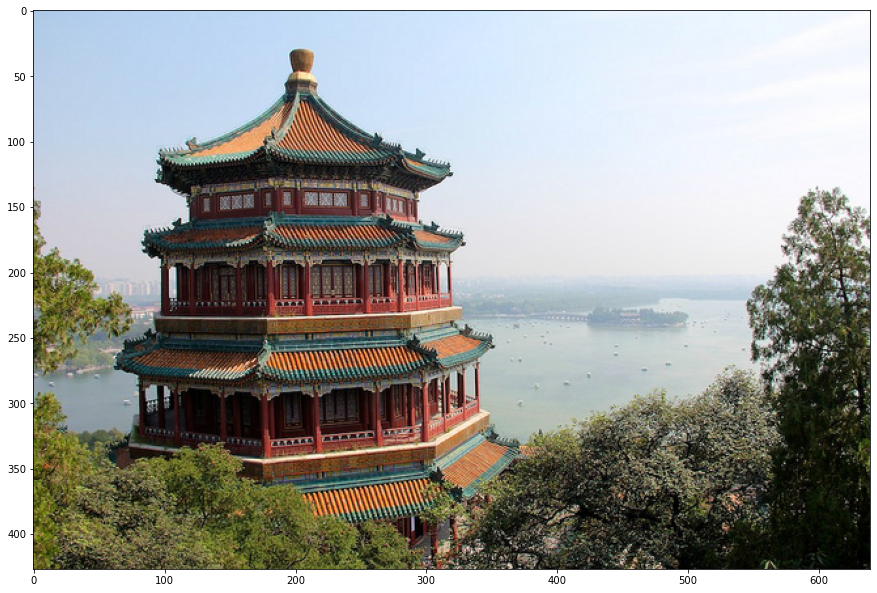

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(china)

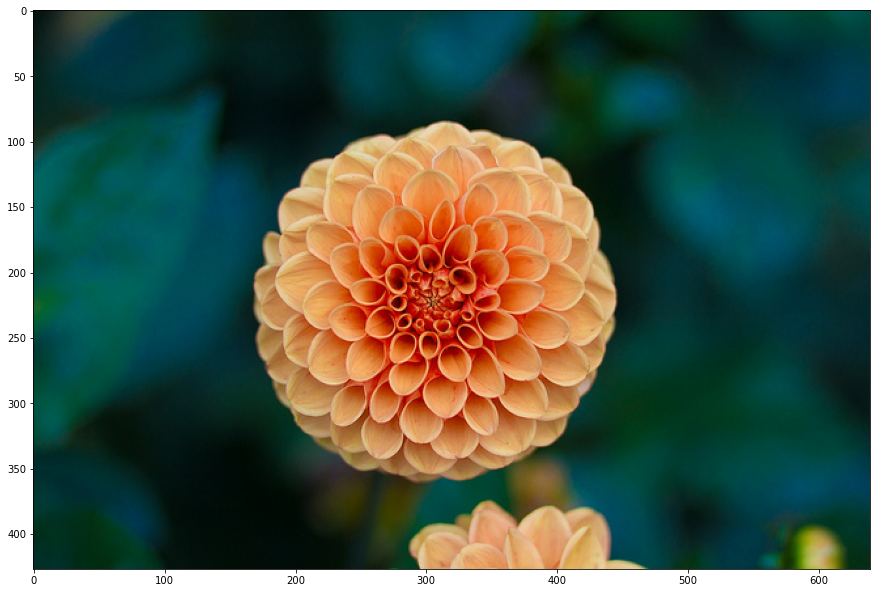

In [7]:
flower = load_sample_image("flower.jpg")
plt.figure(figsize=(15,15))
plt.imshow(flower)

# 决定超参数，数据预处理

In [8]:
n_clusters = 64

china = np.array(china, dtype=np.float64) / china.max()

In [9]:
china

array([[[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ]],

       [[0.6745098 , 0.78039216, 0.89803922],
        [0.67843137, 0.78431373, 0.90196078],
        [0.67843137, 0.78431373, 0.90196078],
        ...,
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ]],

       [[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ]],

       ...,

       [[0.34509804, 0.31372549, 0.02745098],
        [0.57647059, 0.54117647, 0.27058824],
        [0.47843137, 0

In [10]:
w,h,d = original_shape = tuple(china.shape)

In [12]:
assert d == 3

In [14]:
image_array = np.reshape(china, (w*h, d))

In [15]:
image_array

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [16]:
image_array.shape

(273280, 3)

# 用Kmeans做矢量量化操作

In [17]:
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)
kmeans.cluster_centers_

array([[0.11798806, 0.11884058, 0.07007673],
       [0.80874811, 0.82262443, 0.85671192],
       [0.47614379, 0.46895425, 0.27124183],
       [0.92831097, 0.95803234, 0.99566563],
       [0.52      , 0.5254902 , 0.39529412],
       [0.61895425, 0.67712418, 0.70816993],
       [0.31198257, 0.34030501, 0.18954248],
       [0.82923351, 0.90641711, 0.98743316],
       [0.80392157, 0.53006536, 0.3751634 ],
       [0.25202614, 0.23764706, 0.20104575],
       [0.03328773, 0.02836297, 0.01732786],
       [0.3454902 , 0.1854902 , 0.12470588],
       [0.52156863, 0.49150327, 0.52592593],
       [0.74457516, 0.83934641, 0.95045752],
       [0.72941176, 0.35764706, 0.23137255],
       [0.41470588, 0.44656863, 0.40980392],
       [0.96176471, 0.77058824, 0.63039216],
       [0.69019608, 0.74705882, 0.7605042 ],
       [0.57019608, 0.41098039, 0.34588235],
       [0.93630422, 0.93594771, 0.94913844],
       [0.3875817 , 0.45620915, 0.10588235],
       [0.56684492, 0.62388592, 0.64171123],
       [0.

In [18]:
labels = kmeans.predict(image_array)
labels.shape

(273280,)

In [19]:
image_kmeans = image_array.copy()
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

In [20]:
image_kmeans
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [21]:
image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)

# 对数据进行随机矢量量化（与kmeans不同的另一种方法）

In [ ]:
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)
labels_random.shape
len(set(labels_random))
image_random = image_array.copy()
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]
image_random = image_random.reshape(w,h,d)
image_random.shape

# 绘制图像

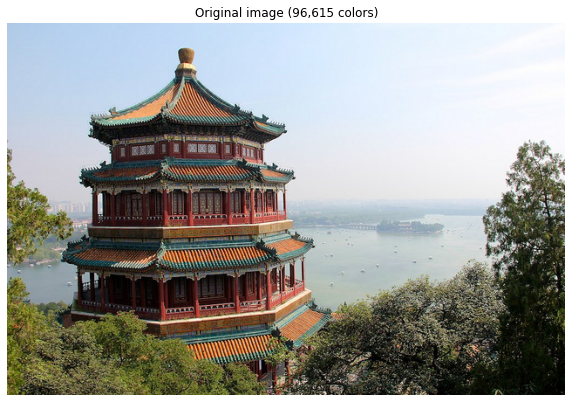

In [22]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

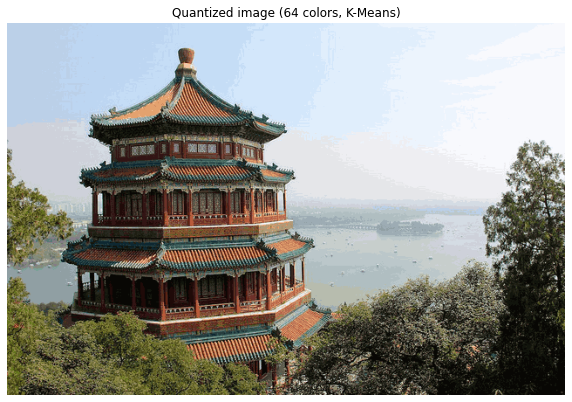

In [23]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(image_kmeans)